In [0]:
# Taking care of imports

from datascience import *
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
# Finding source files

survey = pd.read_csv("SurveySchema.csv")
survey

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q2,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q3,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q4,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,What programming language would you recommend ...,What machine learning frameworks have you used...,What is your age (# years)?,Of the choices that you selected in the previo...,What data visualization libraries or tools hav...,Of the choices that you selected in the previo...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,For how many years have you used machine learn...,Do you consider yourself to be a data scientist?,Which of the following cloud computing product...,Which of the following machine learning produc...,Which of the following relational database pro...,In which country do you currently reside?,Which of the following big data and analytics ...,Which types of data do you currently interact ...,What is the type of data that you currently in...,Where do you find public datasets? (Select all...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,How do you perceive the quality of online lear...,What is the highest level of formal education ...,Which better demonstrates expertise in data sc...,How do you perceive the importance of the foll...,What metrics do you or your organization use t...,Approximately what percent of your data projec...,What do you find most difficult about ensuring...,In what circumstances would you explore model ...,Approximately what percent of your data projec...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,18789,18697,23860,12990,18593,12185,18548,18534,18492,18481,11060,10887,10719,23860,9746,16922,13879,16816,15938,15746,15672,9671,16338,15980,23439,15880,14937,13584,13120,13344,13653,13290,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
6,Or How long have you been writing code to anal...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0
7,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1

In [4]:
# Finding Source Files in my drive

freeform = pd.read_csv('freeFormResponses.csv')
freeform.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q1_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q22_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
0,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,What programming language would you recommend ...,What machine learning frameworks have you used...,What is your gender? - Prefer to self-describe...,Of the choices that you selected in the previo...,What data visualization libraries or tools hav...,Of the choices that you selected in the previo...,Which of the following cloud computing product...,Which of the following machine learning produc...,Which of the following relational database pro...,Which of the following big data and analytics ...,Which types of data do you currently interact ...,What is the type of data that you currently in...,Where do you find public datasets? (Select all...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,What metrics do you or your organization use t...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...
1,NaN,NaN,NaN,NaN,NaN,"Jupyter Notebooks, Pycharm, Intelijidea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,mlcourse.ai,NaN,ods.ai,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,anaconda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning


---



In [5]:
multiple = pd.read_csv('multipleChoiceResponses.csv')
income = multiple[['Q1', 'Q2', 'Q9']]

columns = ['Gender', 'Age', 'Income'] 
income = income[1:] 
income.columns = columns #set the header row as the df header

no_age = income[['Gender', 'Income']]
no_age = no_age[no_age['Income'].notnull()]
no_age = no_age[no_age['Income'] != 'I do not wish to disclose my approximate yearly compensation']
no_age = no_age[no_age['Gender'] != 'Prefer not to say']
no_age = no_age[no_age['Gender'] != 'Prefer to self-describe']



# new data frame with split value columns 
calc = no_age["Income"].str.split("-", n = 1, expand = True) 
calc[0] = calc[0].map(lambda x: x.rstrip('+')) 
calc[0] = calc[0].str.replace(',', '')
calc[1] = calc[1].str.replace(',', '')

calc[[0, 1]] = calc[[0, 1]].apply(pd.to_numeric, errors='coerce')
calc[0] = calc[0] * 1000                    # This will be a little glitchy for the 500K values, but we'll fix it later.
calc['Income'] = calc[[0,1]].mean(axis=1)   # Taking the average for a numberic value we can work with
calc.loc[calc['Income'] > 499999999, 'Income'] = 500000   # Fixing the 500K issue

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#1. Median Incomes of Male and Female Employees


---
Calculate the median income of male employees and the median income of female employees in the population. (look the set of all employees in the datasets as the population). (1 point)


In [6]:
no_age['Income'] = calc['Income'] # Inserting our calculated values back into our original dataframe
groups = no_age.groupby('Gender')['Income'].median().to_frame().reset_index()
groups.head() # Displaying our medians

,Gender,Income
0,Female,25000.0
1,Male,35000.0


# 2. Histogram of Incomes Based on Gender


---
Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population. (You create one histogram for male, and another histogram
for female, but the two histograms will be displayed in the same graph with different
colors). (1 point)



In [8]:
# Switching over to DataScience for the rest of this assignment, since the process is so simple.
no_age.to_csv('gender_income.csv')

income = Table.read_table('gender_income.csv')
income = income.select('Gender', 'Income')
income

Gender,Income
Male,15000
Female,5000
Male,5000
Male,15000
Male,5000
Male,25000
Male,137500
Male,35000
Male,35000
Female,15000


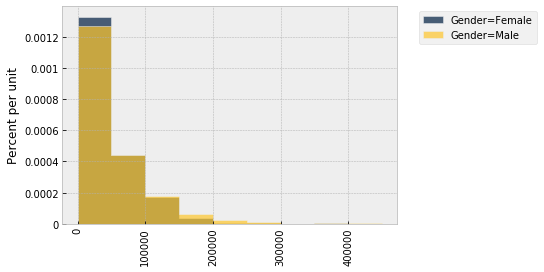

In [10]:
fullbins = np.arange(0,500000,50000)
income.hist('Income', group = 'Gender', bins = fullbins)

We can't tell much about the separate parts of the distribution fron this graph, so let's zoom in:

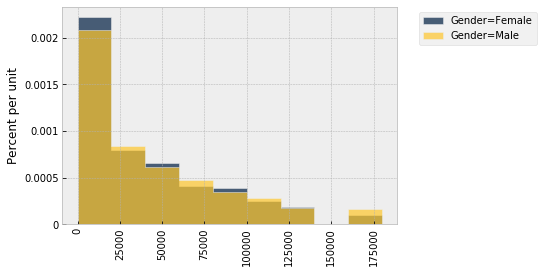

In [11]:
bins = np.arange(0,200000,20000)
income.hist('Income', group = 'Gender', bins = bins)

It seems that there are more women than men who make from between 0 - 20000 per year, while there are more men than women who make 160000 - 180000. 

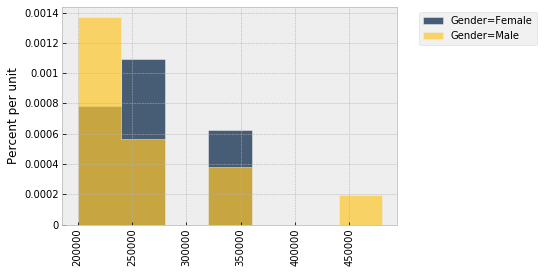

In [12]:
bigbins = np.arange(200000,500000,40000)
income.hist('Income', group = 'Gender', bins = bigbins)

# 3. Bootstrapping and Sampling


---
Use the random sampling, empirical distribution, sample comparison, bootstrap, hypothesis testing as well as A/B testing we discussed in the class to analyze the income gap between female and male employees.

* Select a sample from the population. Make sure your sample include 500 employees selected from the population, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed male employees than female employees (1 point).



In [13]:
# First, let's see how many more men than women are in our dataset
women = income.where('Gender', 'Female')
men = income.where('Gender', 'Male')
print(np.round((women.num_rows/income.num_rows)*100, decimals=1), "% women,", np.round((men.num_rows/income.num_rows)*100, decimals=1), "% men")

# We should expect to see a similar distribution in a sample. We'll round off to 16% women and 84% men.

15.6 % women, 84.4 % men


In [16]:
#Grabbing a sample 0f 500

def sample_pop(n):
    sample = income.sample(n)
    women = sample.where('Gender', 'Female')
    print(np.round((women.num_rows/sample.num_rows)*100, decimals=1))

sample_pop(500)

15.6


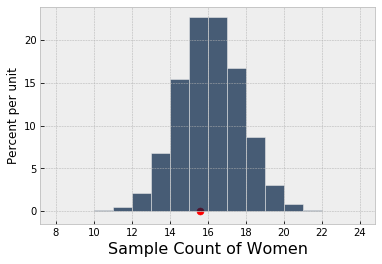

In [17]:
# We can follow the steps outlined in the book to make sure, statistically, 
# that the sample we collect will fall within a normal distribution given the skewed ratio of women to men.

women_to_men = [0.16, 0.84]

# Looking at the proportion of women in one sample of 500
def measure():
  return (100 * sample_proportions(500, women_to_men)).item(0)

# Using a function to look at this proportion 10000 times, and visualizing it
counts = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, measure())

Table().with_column('Sample Count of Women', counts).hist(bins = np.arange(8, 25, 1))
plt.scatter(15.6, 0, color='red', s=50);

To ensure that our sample is representative of the general population, we will need to grab a large number of samples using the parameters of the distribution, as seen above.



---



* Define test statistic, null hypothesis and alternative hypothesis (1 point).

 * Our test statistic can be the difference between the mean income of men and women. 
 * The null hypothesis would be that there is no difference in income between men and women in the population.
 * The alternative hypothesis would be that there is a statistically significant difference between these two groups.



---


* Draw the income histogram for the sample, calculate the median income of the sample, and draw a red dot and a yellow dot of the female median income and male median income of the population, respectively, in the histogram (1 point).



The median income of the sample is 35000.0 



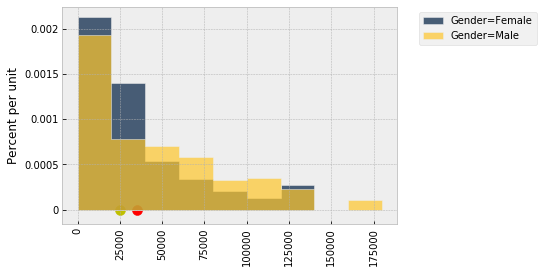

In [18]:
# Getting the sample median and graphing the sample
def sample_pop(n):
    sample = income.sample(n)
    sample.hist(group = 'Gender', bins = bins)
    sample_median = sample.column('Income')
    print("The median income of the sample is",np.median(sample_median),"\n")

sample_pop(500)

# Female median and male median income drawn onto the histogram, respectively.
plt.scatter(25000,0, s=100, c='y')
plt.scatter(35000,0, s=100, c='r')



---


* Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding test statistic of the population(e.g. the difference of the median incomes between female and male employees) in the diagram (1 point).

In [0]:
def sample_stat():
    sample = income.sample(5000)
    men = sample.where('Gender', 'Male')
    men = men.column('Income')
    women = sample.where('Gender', 'Female')
    women = women.column('Income')

    
    sample_test_statistic = np.mean(men) - np.mean(women) # We will choose to subtract women from men
    return sample_test_statistic


In [20]:
# I was previously using the median between the genders in the population, so let's calculate the population test statistic real quick

men_pop = income.where('Gender', 'Male')
men_pop = men_pop.column('Income')
women_pop = income.where('Gender', 'Female')
women_pop = women_pop.column('Income')

population_test_statistic = np.mean(men_pop) - np.mean(women_pop)
print("Our population test statistic — the mean difference between male and female incomes, is",np.round(population_test_statistic,2), "dollars.")

Our population test statistic — the mean difference between male and female incomes, is 6559.43 dollars.


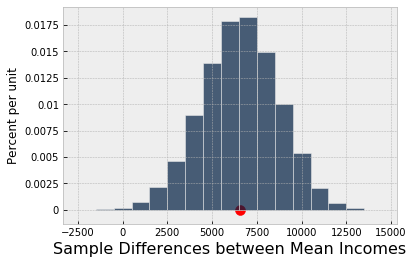

In [21]:
# Using a function to look at the sample statistic 10000 times, and visualizing it
counts = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, sample_stat())

counts_table = Table().with_column('Sample Differences between Mean Incomes', counts)
counts_table.hist(bins = np.arange(-2500, 15000, 1000))
plt.scatter(population_test_statistic, 0, color='red', s=100);



---


* Write a procedure to use bootstrap to produce at least 5000 samples (1 point)

In [0]:
sample = counts_table.sample(5000) # Grabbing a sample of counts.

def bootstrap_mean(sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = sample.select(label)
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        means = np.append(means, resampled_mean)
        
    return means

bootstrap = bootstrap_mean(sample, 'Sample Differences between Mean Incomes', 5000)




---


* Draw the histogram of the test statistic of the bootstrap samples (1 point).

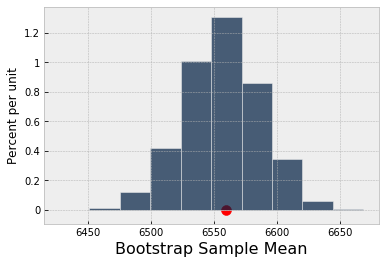

In [23]:
resampled_medians = Table().with_column('Bootstrap Sample Mean', bootstrap)
resampled_medians.hist()

plt.scatter(population_test_statistic, 0, color='red', s=100);



---


* Define confidence interval and P-value to validate the hypothesis you defined (2 points).

In [28]:
# We define our confidence interval by looking at the middle 95% of the bootstrapped sample means:

lbound = np.round(percentile(2.5, bootstrap), 2)
rbound = np.round(percentile(97.5, bootstrap), 2)

make_array(lbound, rbound)

array([6496.25, 6615.01])

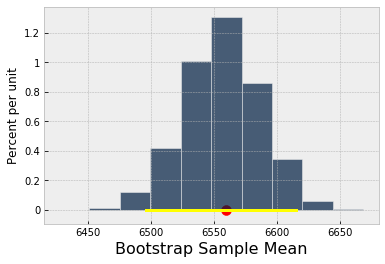

In [32]:
# We can draw the confidence interval onto the bootstrapped means histogram as well.
# This means 95 out of 100 times, we can say that a sample taken from the population
# will have a test statistic (difference between the mean of men's and women's incomes)
# between $6496 and $6615

# I am using a 95% cutoff for the p-value (p = .05), but even if I were using a 99% confidence interval,
# the null hypothesis would be rejected.

resampled_medians.hist()
plt.plot(make_array(lbound, rbound), make_array(0, 0), color='yellow', lw=3);
plt.scatter(population_test_statistic, 0, color='red', s=100);